In [62]:
import pandas as pd
import string

In [63]:
df = pd.read_csv("dataset/train/metadata.csv")

df.head()

,file_name,text,audiofile
0,r1nicOVtvkQ.png,A woman talks nearby as water pours,./data/audiocaps/dataset/train/r1nicOVtvkQ.wav
1,UDGBjjwyaqE.png,Multiple clanging and clanking sounds,./data/audiocaps/dataset/train/UDGBjjwyaqE.wav
2,3eJ9RynJzP8.png,"The wind is blowing, insects are singing, and...",./data/audiocaps/dataset/train/3eJ9RynJzP8.wav
3,3eK62q7SnVU.png,The wind is blowing and rustling occurs,./data/audiocaps/dataset/train/3eK62q7SnVU.wav
4,3eGXNIadwGk.png,Person is whistling,./data/audiocaps/dataset/train/3eGXNIadwGk.wav


In [64]:
# Pre-process metadata
# tokenise text
df["tokens"] = df["text"].apply(lambda x: x.split())

# lowercase text
df["tokens"] = df["tokens"].apply(lambda x: [word.lower() for word in x])

# remove punctuation
df['tokens'] = df['tokens'].apply(lambda x: [''.join(c for c in word if c not in string.punctuation) for word in x])

df.head()

,file_name,text,audiofile,tokens
0,r1nicOVtvkQ.png,A woman talks nearby as water pours,./data/audiocaps/dataset/train/r1nicOVtvkQ.wav,"[a, woman, talks, nearby, as, water, pours]"
1,UDGBjjwyaqE.png,Multiple clanging and clanking sounds,./data/audiocaps/dataset/train/UDGBjjwyaqE.wav,"[multiple, clanging, and, clanking, sounds]"
2,3eJ9RynJzP8.png,"The wind is blowing, insects are singing, and...",./data/audiocaps/dataset/train/3eJ9RynJzP8.wav,"[the, wind, is, blowing, insects, are, singing..."
3,3eK62q7SnVU.png,The wind is blowing and rustling occurs,./data/audiocaps/dataset/train/3eK62q7SnVU.wav,"[the, wind, is, blowing, and, rustling, occurs]"
4,3eGXNIadwGk.png,Person is whistling,./data/audiocaps/dataset/train/3eGXNIadwGk.wav,"[person, is, whistling]"


In [65]:
# Word frequency analysis
from collections import Counter

all_tokens = [token for sublist in df['tokens'].tolist() for token in sublist]
word_counts = Counter(all_tokens)

{'once', 'between', 'hers', 'wouldn', 'does', 'theirs', 'while', "mustn't", 'until', 'as', 'now', 'whom', "she's", 'wasn', 'its', 'doing', 'their', 'than', 'hasn', "you'll", 'from', "shan't", 'shouldn', 'the', 'and', 'his', 'both', 'only', 'after', 've', 'yourselves', 'too', 'if', 'for', 'because', 'just', 'into', 'we', "aren't", 'll', 'very', 'of', 'so', 'other', 'before', 'that', 'own', 'a', 'did', 'with', 'won', 'your', "that'll", 'there', 's', 'what', 'those', 'am', 'was', 'up', 'to', 'is', 'not', 'again', "don't", 'needn', "hadn't", "hasn't", 'you', 'doesn', 'has', 'few', 'this', "you're", 'it', 'an', "it's", 'on', 'o', 'shan', 'any', 'me', "needn't", 'nor', 'yours', 'herself', 'isn', 'further', 'all', 'ain', 'have', 'mustn', "doesn't", 'aren', 'each', "didn't", 'then', 'during', 'd', "should've", 'weren', 'haven', "won't", 'were', "wasn't", 'at', 'him', 'do', 'my', 'ours', 'mightn', 'her', 'same', 'being', "couldn't", "weren't", 'm', 'where', 'our', "mightn't", 'yourself', 'be', 

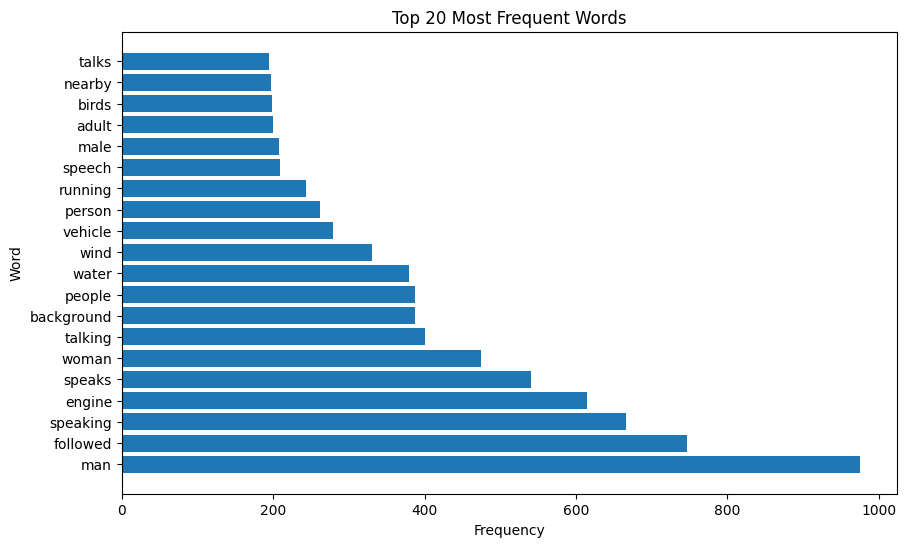

In [66]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# nltk.download('stopwords')

sorted_counts = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

stop_words = set(stopwords.words('english'))

print(stop_words)

for word in stop_words:
    if word in sorted_counts:
        sorted_counts.pop(word)

# Split the keys and values into separate lists
words = list(sorted_counts.keys())
frequencies = list(sorted_counts.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(words[:20], frequencies[:20])  # Plotting top 20 frequent words
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Words')
plt.show()


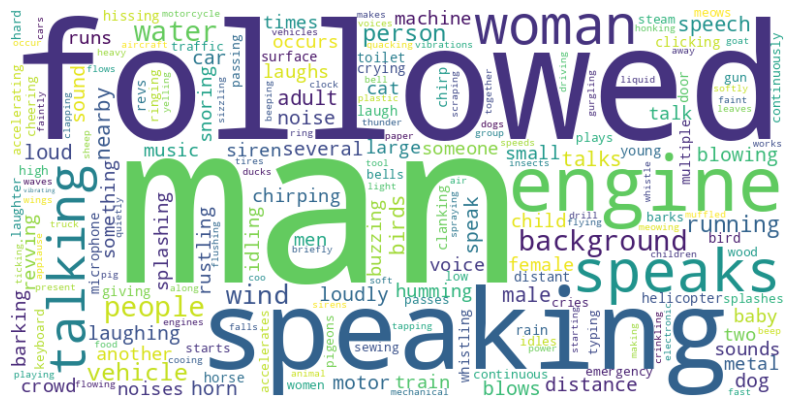

In [67]:
from wordcloud import WordCloud

# Create a word cloud from the frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sorted_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


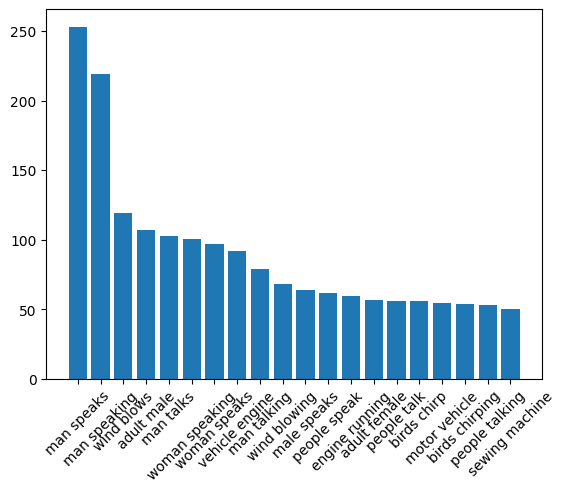

In [68]:
# N-gram analysis
from nltk import FreqDist
from nltk.util import bigrams

# bigram
all_bigrams = [(word1, word2) for tokens in df["tokens"] for word1, word2 in zip(tokens[:-1], tokens[1:]) if word1.lower() not in stop_words and word2.lower() not in stop_words]

bigram_freq = Counter(all_bigrams)

# Plot the 5 most common bigrams
common_bigrams = bigram_freq.most_common(20)
if common_bigrams:
    labels, values = zip(*common_bigrams)
    labels = [f"{x[0]} {x[1]}" for x in labels]  # Convert tuple to string for better labeling
    plt.bar(range(len(labels)), values, tick_label=labels)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No bigrams to plot.")


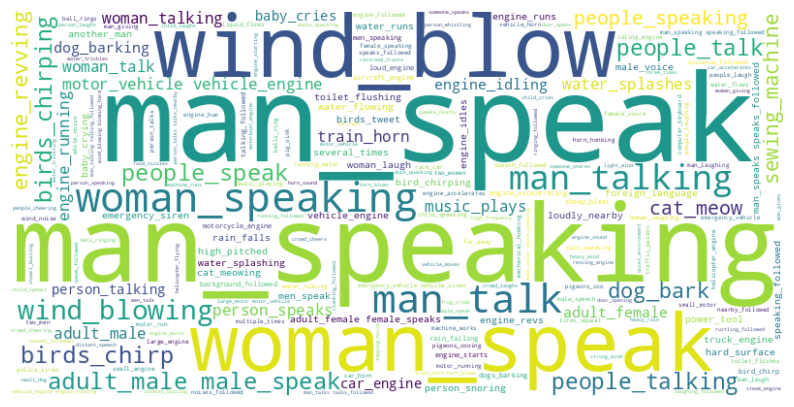

In [70]:
# Flatten bigrams for wordcloud

bigram_string = ' '.join(['_'.join(bigram) for bigram in all_bigrams])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_string)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
